In [11]:
%matplotlib inline

In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats 
import statsmodels.formula.api as sm
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression as LR

In [ ]:
matplotlib.rcParams.update({'font.size': 22})

In [2]:
states = pd.read_csv('states.csv')
states

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


array([[<AxesSubplot:xlabel='metro_res', ylabel='metro_res'>,
        <AxesSubplot:xlabel='white', ylabel='metro_res'>,
        <AxesSubplot:xlabel='hs_grad', ylabel='metro_res'>,
        <AxesSubplot:xlabel='poverty', ylabel='metro_res'>,
        <AxesSubplot:xlabel='female_house', ylabel='metro_res'>],
       [<AxesSubplot:xlabel='metro_res', ylabel='white'>,
        <AxesSubplot:xlabel='white', ylabel='white'>,
        <AxesSubplot:xlabel='hs_grad', ylabel='white'>,
        <AxesSubplot:xlabel='poverty', ylabel='white'>,
        <AxesSubplot:xlabel='female_house', ylabel='white'>],
       [<AxesSubplot:xlabel='metro_res', ylabel='hs_grad'>,
        <AxesSubplot:xlabel='white', ylabel='hs_grad'>,
        <AxesSubplot:xlabel='hs_grad', ylabel='hs_grad'>,
        <AxesSubplot:xlabel='poverty', ylabel='hs_grad'>,
        <AxesSubplot:xlabel='female_house', ylabel='hs_grad'>],
       [<AxesSubplot:xlabel='metro_res', ylabel='poverty'>,
        <AxesSubplot:xlabel='white', ylabel='poverty

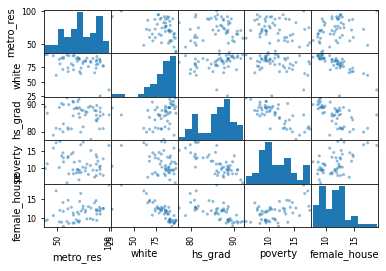

In [3]:
pd.plotting.scatter_matrix(states)

In [15]:
x = states[states['white'] > 50]['female_house'].to_numpy()
y = states[states['white'] > 50]['white'].to_numpy()

In [25]:
y.std()/x.std()

4.371632060047006

In [21]:
pearsonr(x, y)

(-0.8621736775493619, 1.75693757129518e-15)

In [22]:
b1 = y.std()/x.std() * pearsonr(x, y)[0]
b0 = y.mean() - b1*x.mean()

xx = np.linspace(min(x), max(x))
yy = b0 + b1*xx 

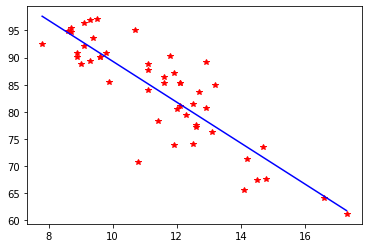

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, '*r')
ax.plot(xx, yy, '-b')

In [62]:
X, Y = states['hs_grad'].values.reshape(-1, 1), states['poverty'].values.reshape(-1, 1)
lr = LR()
lr.fit(X, Y)

x = np.linspace(X.min(), X.max()).reshape(-1, 1)
y = lr.predict(x)


In [68]:
lr.coef_, lr.intercept_

(array([[-0.62121672]]), array([64.78096577]))

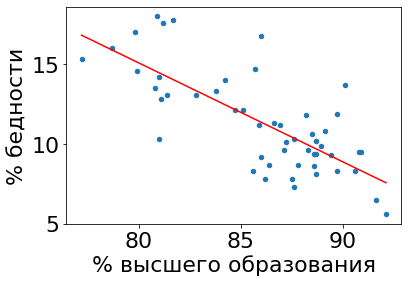

In [63]:
ax = states.plot.scatter(x='hs_grad', y='poverty')
ax.set_xlabel('% высшего образования')
ax.set_ylabel('% бедности')
ax.plot(x, y, '-r')

In [38]:
states.loc[:, ['poverty', 'hs_grad']].describe()

,poverty,hs_grad
count,51.000000,51.000000
mean,11.349020,86.011765
std,3.099185,3.725998
min,5.600000,77.200000
25%,9.250000,83.300000
50%,10.600000,86.900000
75%,13.400000,88.700000
max,18.000000,92.100000


In [76]:
result = stats.linregress(states['hs_grad'], 
                                                                               states['poverty'])

In [83]:
result.slope, result.intercept, result.pvalue, result.rvalue, result.stderr, result.intercept_stderr

(-0.6212167177940106,
 64.78096577010209,
 3.10882981031841e-10,
 -0.7468582531582505,
 0.0790164710017928,
 6.802595178281202)

In [73]:
stats.linregress()

<function scipy.stats._stats_mstats_common.linregress(x, y=None, alternative='two-sided')>

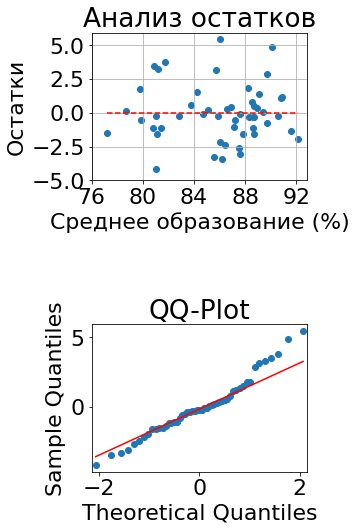

In [115]:
# получаем данные и вычисляем коэффициэнты регрессионной модели
data=pd.read_csv('states.csv', sep=',')
y1, x1 = "poverty", "hs_grad"
form = f"{y1} ~ {x1}"
intercept, slope = sm.ols(formula=form, data=data).fit().params
X = data['hs_grad']
Y = data['poverty']

# вычисляем остатки - на сколько Y далека от теоретической модели
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# создаем графики
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
# scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sma.qqplot(residuals, line='q', ax=ax2)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)

In [110]:
y = 'white'
x = 'female_house'
"{0} ~ {1}".format(y, x) == 'white ~ female_house'

True

statsmodels:                              OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           3.11e-10
Time:                        22:40:58   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7810      6.803      

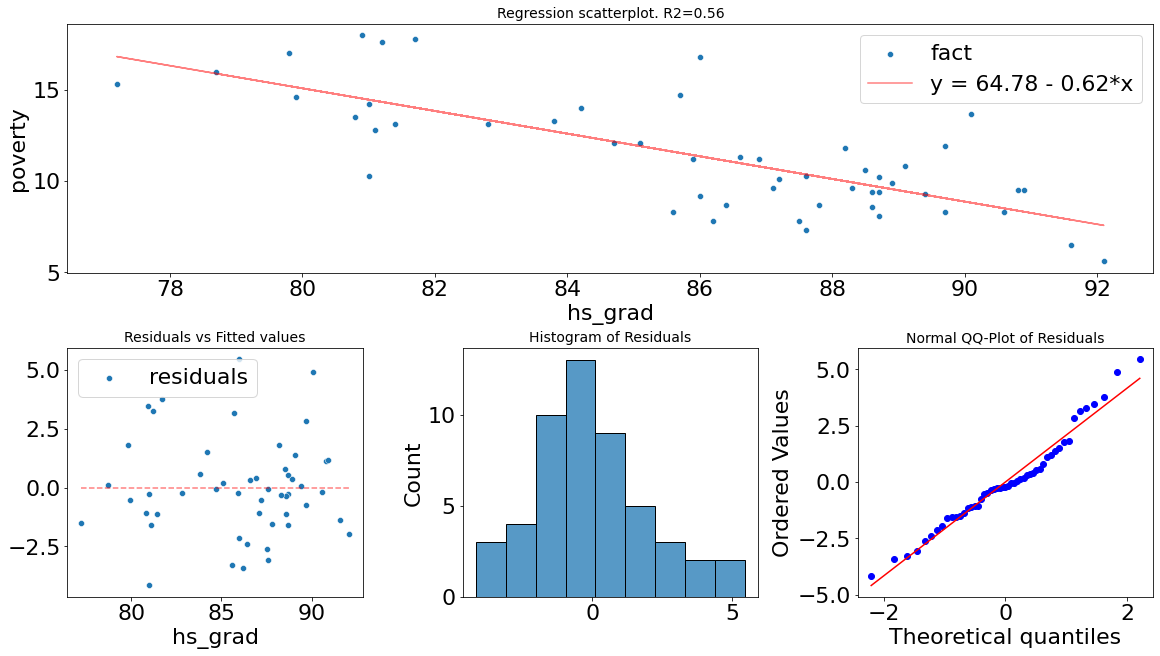

In [124]:
def calc_ols_statmodels(x, y, data):
#     x_for_ols = sm.add_constant(x)
    model = sm.ols(formula=f"{y} ~ {x}", data=data)
    results = model.fit()
    print('statsmodels: ', results.summary())
    
    # regression formula --------------------------------
    if results.params[1]>0:
        sign="+"
    else:
        sign="-"
    formula = f"y = {results.params[0]:.2f} {sign} {np.abs(results.params[1]):.2f}*x"
    print("-"*80)
    print("OLS Formula: ", formula)

    # Graphics ================================
    fig = plt.figure(figsize=(16,9), constrained_layout=True)
    gs = fig.add_gridspec(ncols=3, nrows=2)
    ax_main = fig.add_subplot(gs[0,:])
    ax_resid = fig.add_subplot(gs[1,0])
    ax_hist = fig.add_subplot(gs[1,1])
    ax_qqplot = fig.add_subplot(gs[1,2])

    # Scatterplot -----------------------------
    sns.scatterplot(x=data[x], y=data[y], ax=ax_main, label="fact")
    ax_main.plot(data[x], results.predict(), color='red', alpha=0.5, label=formula)
    ax_main.set_title(f"Regression scatterplot. R2={results.rsquared:.2f}", fontsize=14)
    ax_main.legend()

    # Residuals -------------------------------
    sns.scatterplot(x=data[x], y=results.resid, ax=ax_resid, label="residuals")
    ax_resid.hlines(0, data[x].min(), data[x].max(), linestyle='--', colors='red', alpha=0.5)
    ax_resid.set_title(f"Residuals vs Fitted values", fontsize=14)

    # Hist -------------------------------------
    sns.histplot(results.resid, ax=ax_hist,)
    ax_hist.set_title("Histogram of Residuals", fontsize=14)
    # ax_hist.legend()

    # QQ Plot ----------------------------------
    # sm.qqplot(results.resid, ax=ax_qqplot) # не такой секси
    stats.probplot(results.resid, dist="norm", plot=ax_qqplot)
    ax_qqplot.set_title("Normal QQ-Plot of Residuals", fontsize=14)

    plt.show()

# ==================================================    
# пример вызова процедуры
calc_ols_statmodels("hs_grad", "poverty", states) 
# calc_ols_statmodels("female_house", "white", states)  